In [ ]:
import pandas as pd 
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
metadata = pd.read_json("/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/metadata.json")

metadata.head()

,copyright,date,location,pano_id,status,_file
0,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_0.jpg
1,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_1.jpg
2,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_2.jpg
3,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_3.jpg
4,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_4.jpg


In [ ]:
metadata[['lat','lon']] = metadata.location.apply(lambda x: pd.Series(str(x).split(",")))

In [ ]:
metadata.head()
#metadata.info()

,copyright,date,location,pano_id,status,_file,lat,lon
0,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_0.jpg,{'lat': 41.92667912096311,'lng': -87.69075278911684}
1,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_1.jpg,{'lat': 41.92667912096311,'lng': -87.69075278911684}
2,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_2.jpg,{'lat': 41.92667912096311,'lng': -87.69075278911684}
3,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_3.jpg,{'lat': 41.92667912096311,'lng': -87.69075278911684}
4,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_4.jpg,{'lat': 41.92667912096311,'lng': -87.69075278911684}


In [ ]:
metadata['lat']= metadata['lat'].astype(str).map(lambda x: x.strip("'{lat:'"))
metadata['lon']= metadata['lon'].astype(str).map(lambda x: x.strip("'lng:}'"))



In [ ]:
metadata.head()

,copyright,date,location,pano_id,status,_file,lat,lon
0,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_0.jpg,41.92667912096311,'lng': -87.69075278911684
1,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_1.jpg,41.92667912096311,'lng': -87.69075278911684
2,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_2.jpg,41.92667912096311,'lng': -87.69075278911684
3,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_3.jpg,41.92667912096311,'lng': -87.69075278911684
4,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_4.jpg,41.92667912096311,'lng': -87.69075278911684


In [ ]:
metadata.to_csv(r'/content/gdrive/Shareddrives/ComED Codes and Data/Keras /streetview_objectmapping/Sample dataset/Traffic lights 50/coordinates.csv', index = False)

In [ ]:
metadata['year'] =  pd.DatetimeIndex(metadata['date']).year
metadata['month'] =  pd.to_datetime(metadata['date'], format='%m').dt.month_name().str.slice(stop=3)

metadata.head()

,copyright,date,location,pano_id,status,_file,year,month
0,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_0.jpg,2019.0,Jul
1,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_1.jpg,2019.0,Jul
2,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_2.jpg,2019.0,Jul
3,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_3.jpg,2019.0,Jul
4,© Google,2019-07-01,"{'lat': 41.92667912096311, 'lng': -87.69075278...",ktaqgQrwBEmkOvLrXVuAJA,OK,gsv_4.jpg,2019.0,Jul


Text(0.5, 1.0, 'Image distribution across years')

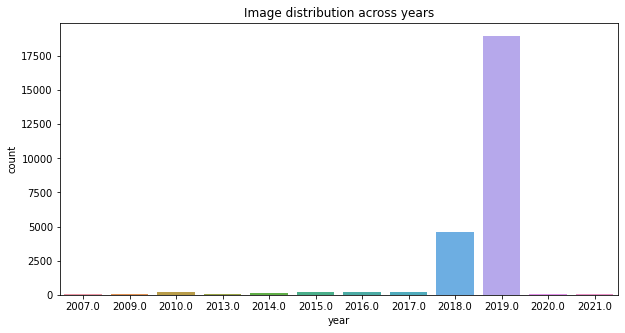

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))

sns.countplot(data = metadata, x='year')
plt.title("Image distribution across years")

In [ ]:
metadata.groupby('year').count()['month']/metadata.groupby('year').count()['month'].sum()

year
2007.0    0.001292
2009.0    0.001615
2010.0    0.008721
2013.0    0.002584
2014.0    0.004845
2015.0    0.009367
2016.0    0.007752
2017.0    0.008721
2018.0    0.185078
2019.0    0.765827
2020.0    0.003230
2021.0    0.000969
Name: month, dtype: float64

'\nThe images we have are from Jul, Aug, June, May. \n\n\npros : clear images. \n\ncons : data of the problematic time are not taken.\n         no snow period images. \n            possibly the authenticity of the analysis can be judged. \n\n'

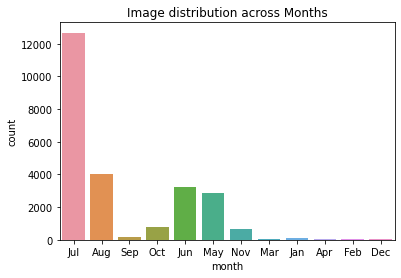

In [ ]:
sns.countplot(data = metadata,x='month')
plt.title("Image distribution across Months")
"""
The images we have are from Jul, Aug, June, May. 


pros : clear images. 

cons : data of the problematic time are not taken.
         no snow period images. 
            possibly the authenticity of the analysis can be judged. 

"""